# **Final Project**

## Objective

Lorem ipsum dolor sit amet

## Datasets

[Customer Segmentation Credit Card](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m) - **23 Columns 10k Rows** - **✓**

## 00. Import Libraries

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import chi2_contingency

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import pickle
import warnings
warnings.filterwarnings('ignore')

## 01. Data Loading

In [2]:
#read csv file
bank_df = pd.read_csv('./datasets/BankChurners.csv')
df_copy = bank_df.copy()

print(f'Dataset Columns: {bank_df.shape[1]}')
print(f'Dataset Rows: {bank_df.shape[0]}')

Dataset Columns: 23
Dataset Rows: 10127


In [3]:
#check head
bank_df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
#check info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
#drop unused columns
bank_df.drop(columns=["CLIENTNUM", 
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [6]:
#check null value
bank_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
#check duplicate data
bank_df.duplicated().sum()

0

## 02. EDA

In [8]:
#check basic statistics
bank_df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [9]:
#separate numeric and category column
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
cat_col = bank_df.select_dtypes(include=object).columns.tolist()

print(f'Numeric Column : {num_col}')
print(f'Category Column : {cat_col}')

Numeric Column : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Category Column : ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [10]:
#set plot style
sns.set(style="whitegrid")
palette=["teal", "darkblue"]

#define hist plot function
def hist_plot(column, loc, row, axs):
    ax = sns.histplot(data=bank_df, x=column, ax=axs[loc,row], kde=True, bins=50, palette=palette, hue="Attrition_Flag")
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

#define count plot function
def count_plot(column, loc, row, axs):
    if column != "Attrition_Flag":
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", alpha=0.7)
    else:
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, alpha=0.7)
        
    ax.tick_params(axis="x", rotation=15)
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)
    
#define boxplot
def box_plot(column, loc, row, axs):
    ax = sns.boxplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", fliersize=3, boxprops=dict(alpha=.7))
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

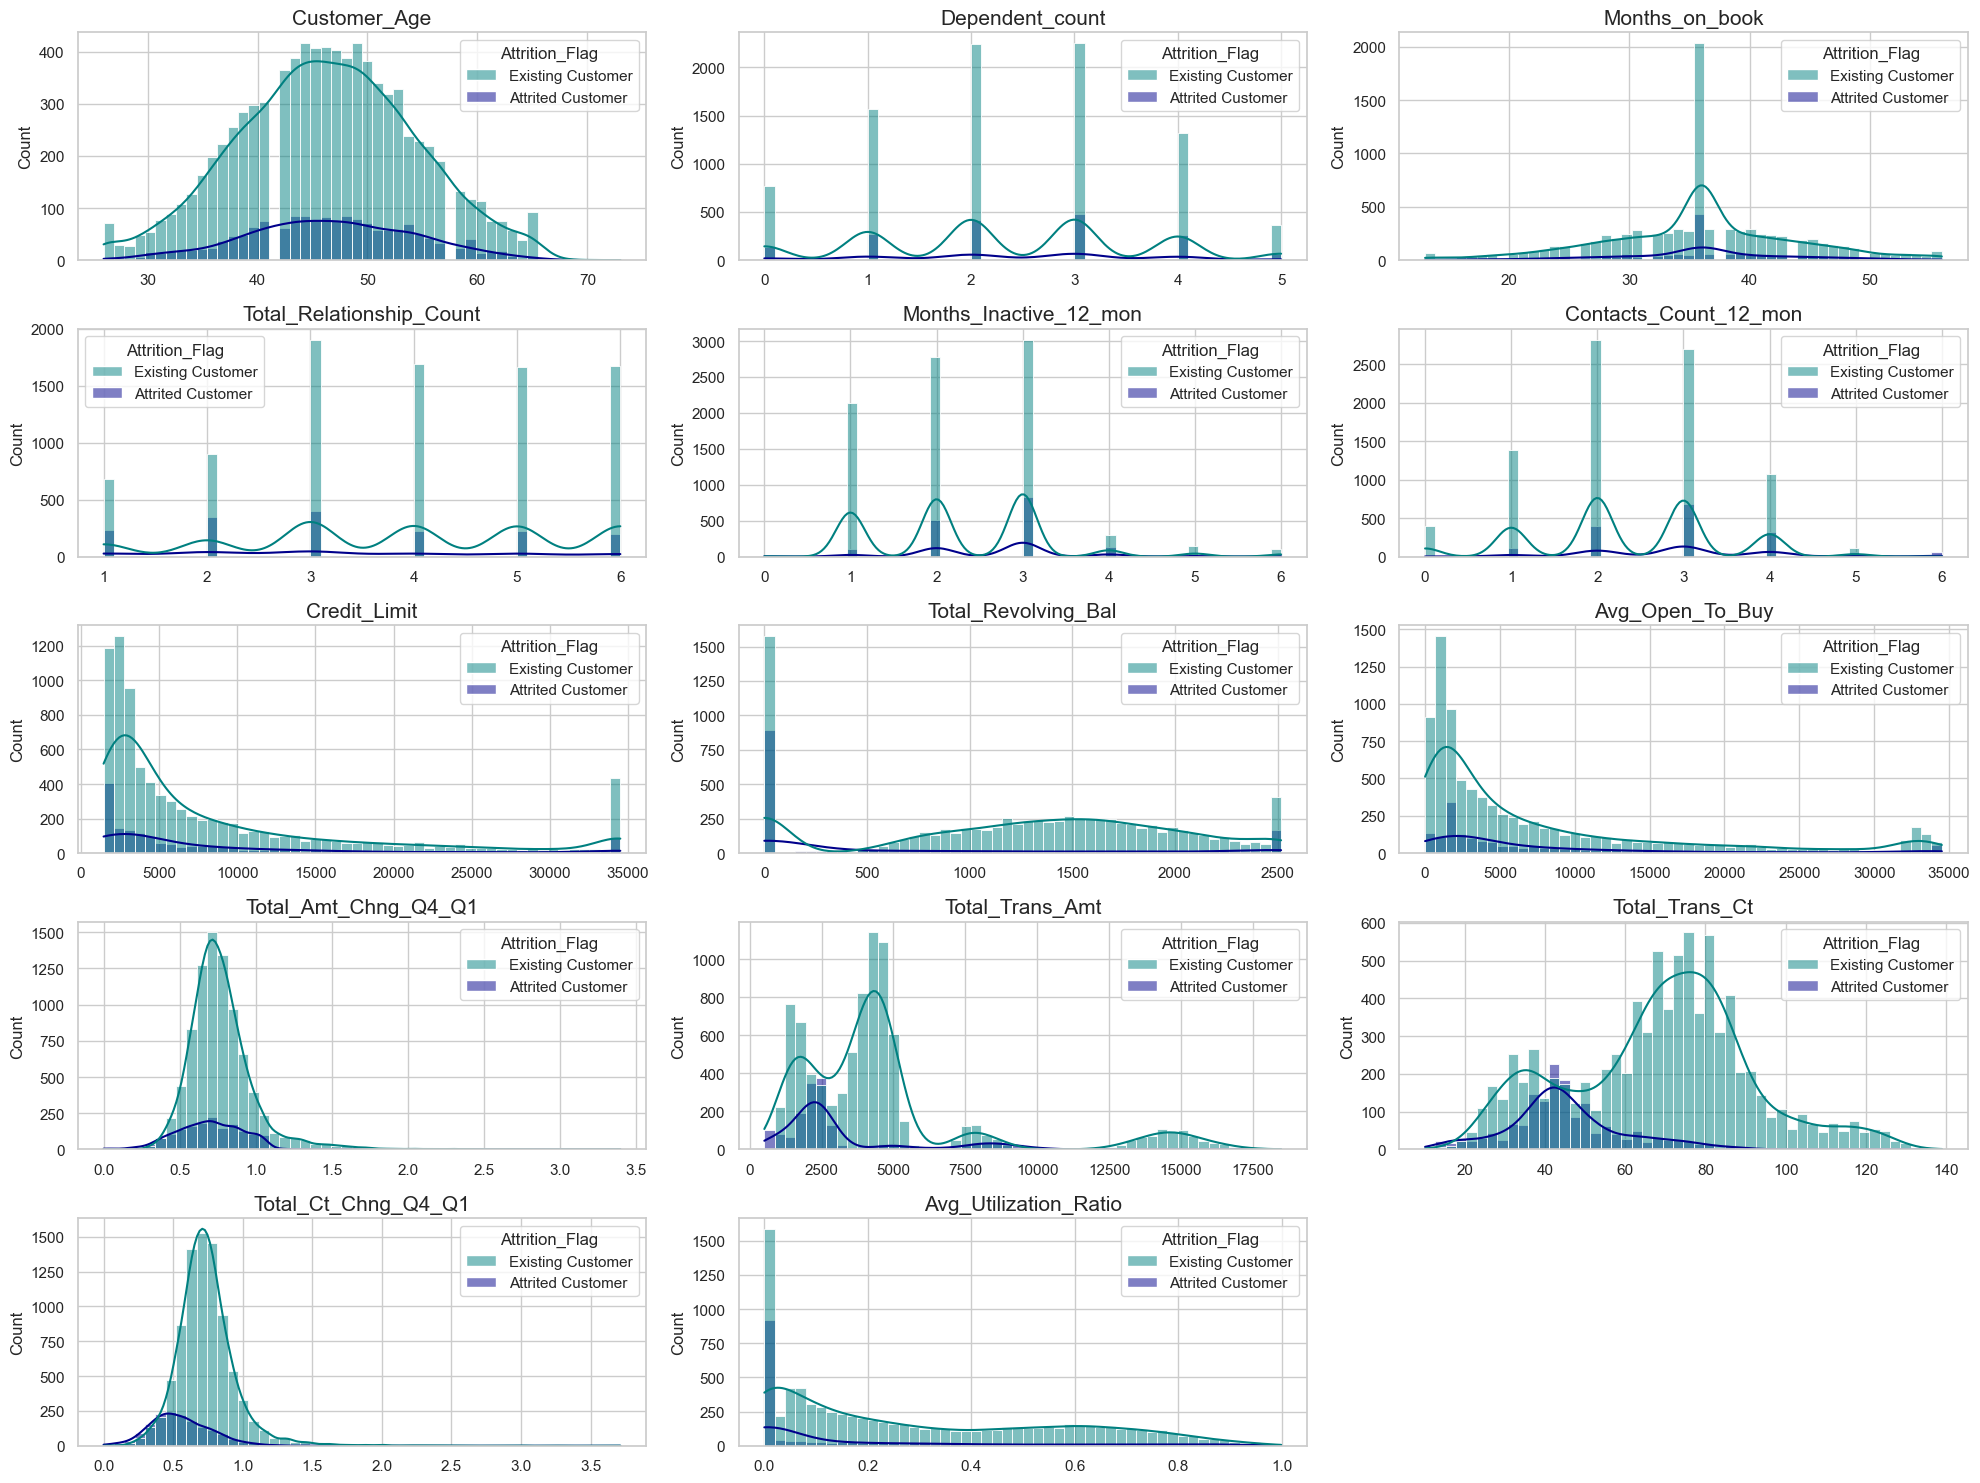

In [11]:
#loop num_col
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        hist_plot(x, 0, i, axs)
    elif i < 6:
        hist_plot(x, 1, i-3, axs)
    elif i < 9:
        hist_plot(x, 2, i-6, axs)
    elif i < 12:
        hist_plot(x, 3, i-9, axs)
    elif i < 15:
        hist_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

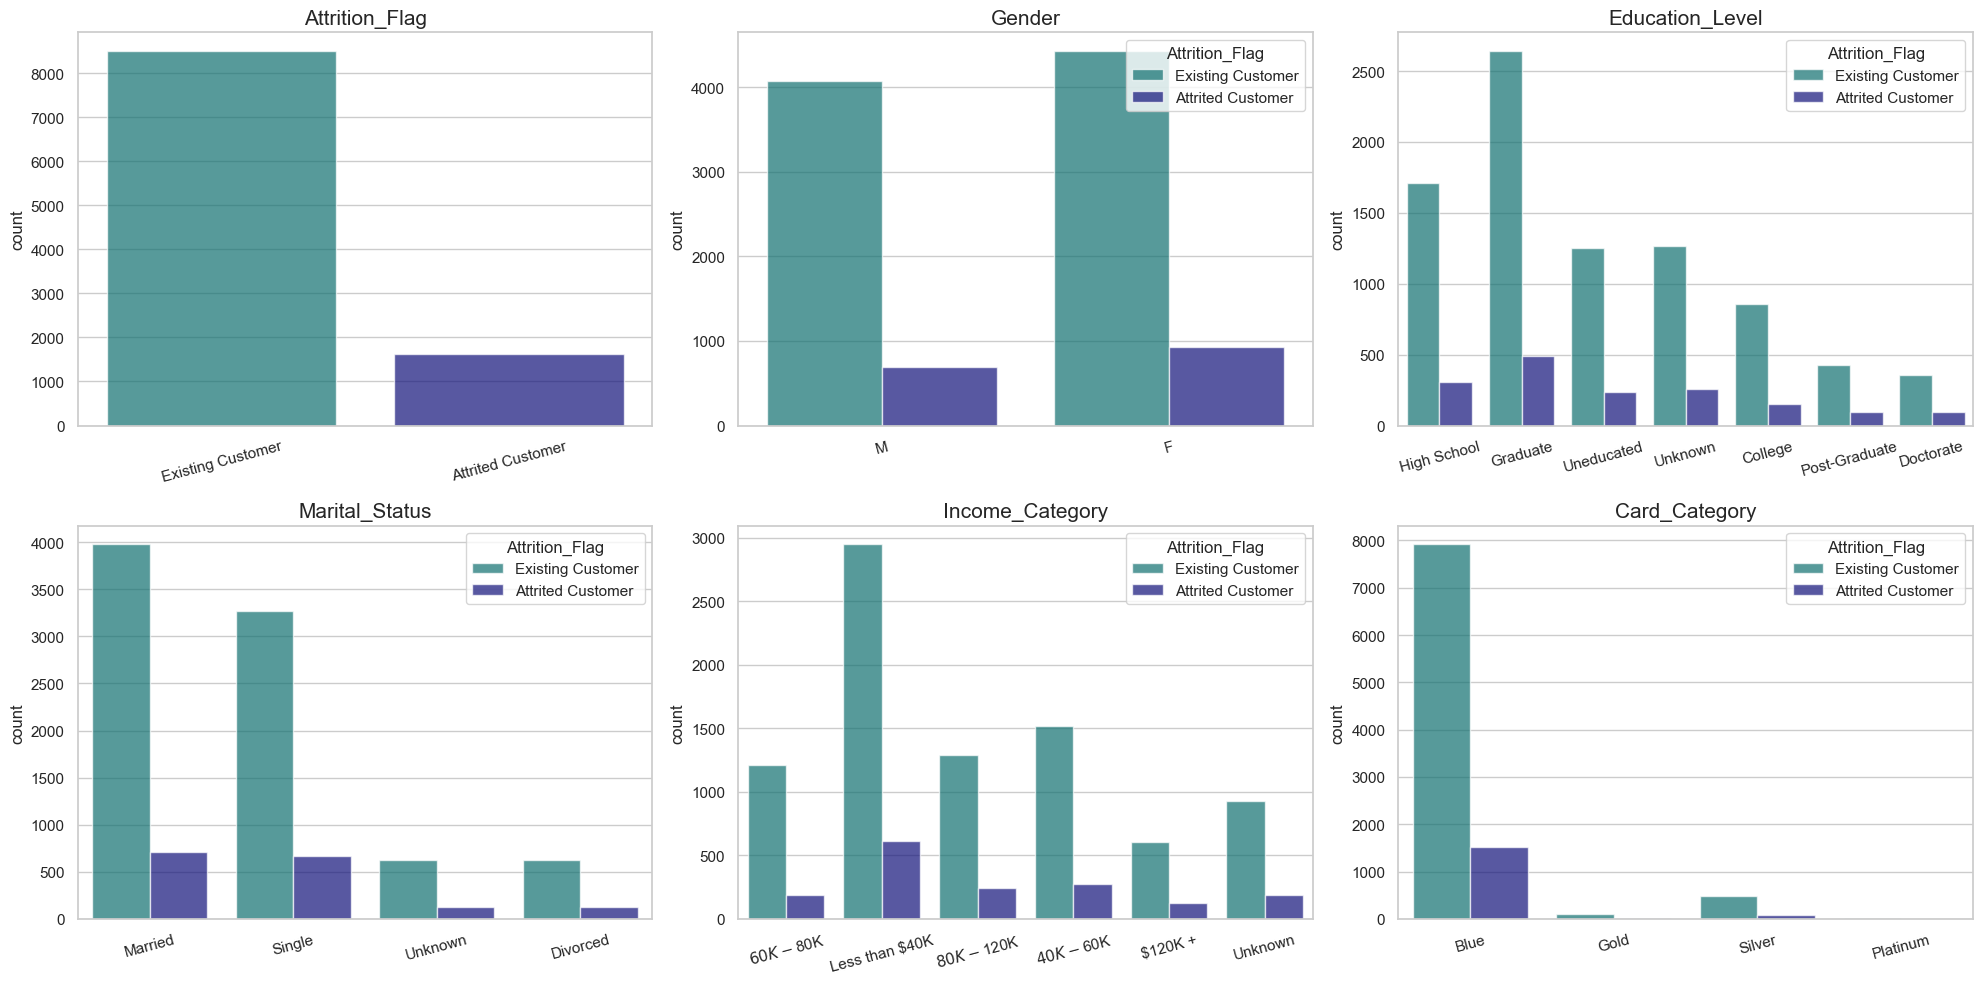

In [12]:
#loop categorical column
fig, axs = plt.subplots(2,3, figsize=(20,10))
for i,x in enumerate(cat_col):
    if i < 3:
        count_plot(x, 0, i, axs)
    elif i < 6:
        count_plot(x, 1, i-3, axs)

fig.tight_layout()


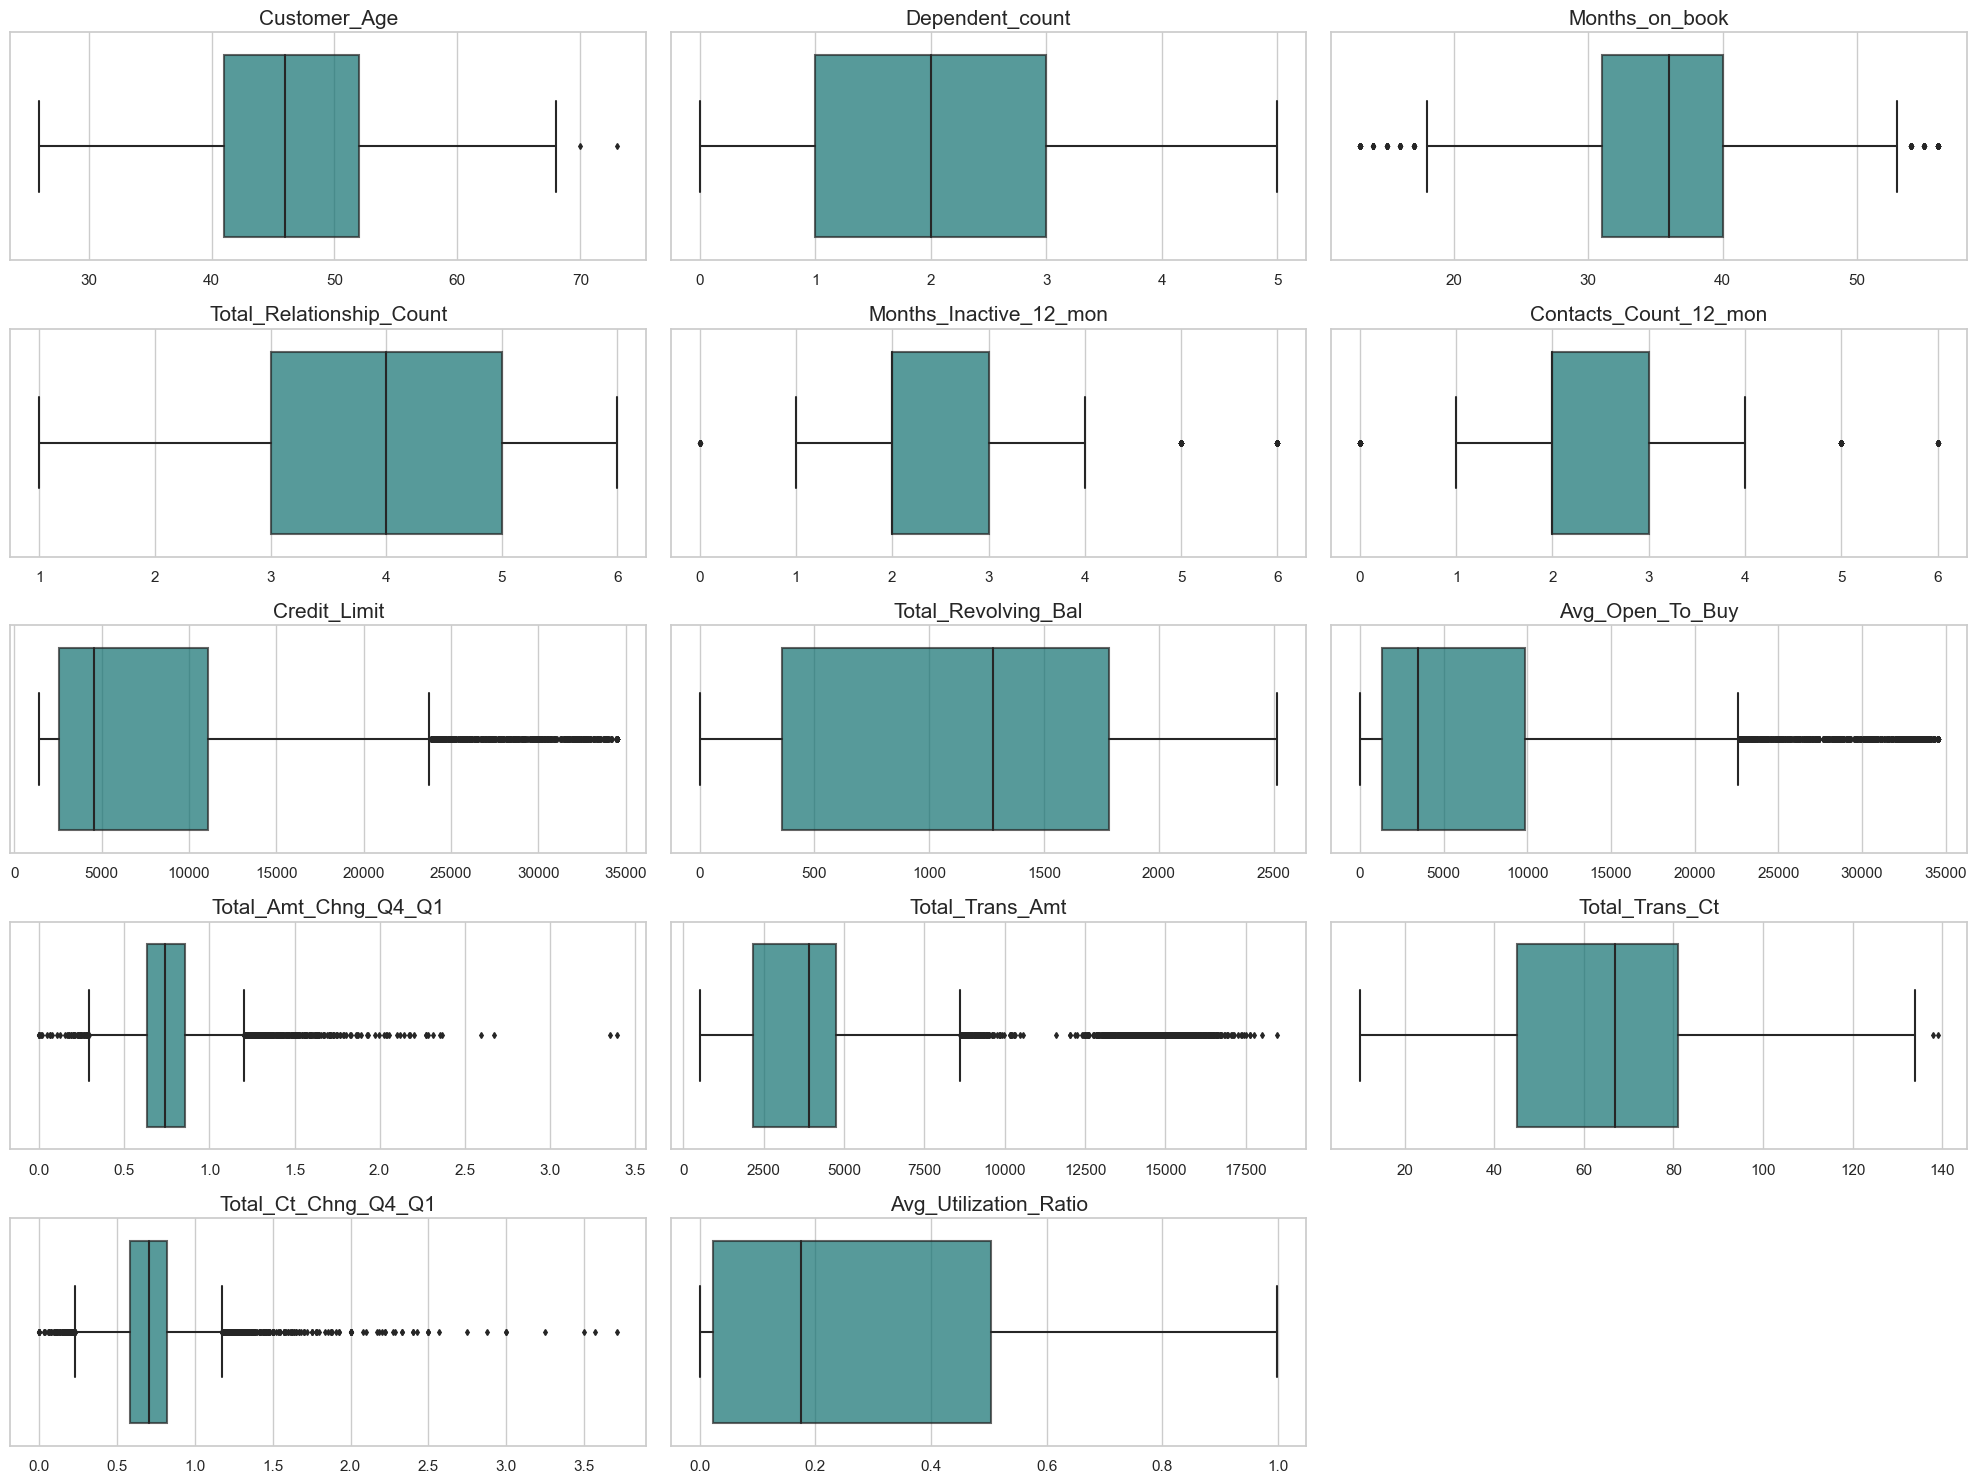

In [13]:
#loop boxplot
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        box_plot(x, 0, i, axs)
    elif i < 6:
        box_plot(x, 1, i-3, axs)
    elif i < 9:
        box_plot(x, 2, i-6, axs)
    elif i < 12:
        box_plot(x, 3, i-9, axs)
    elif i < 15:
        box_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

<Axes: xlabel='Months_Inactive_12_mon', ylabel='count'>

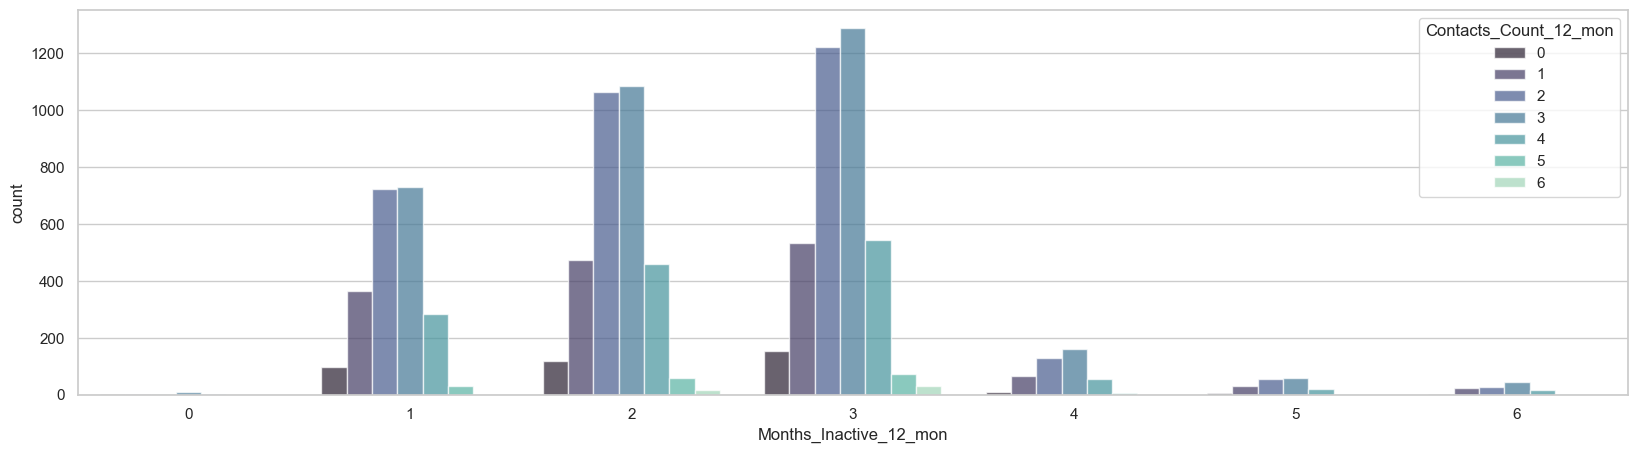

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='Months_Inactive_12_mon',data=bank_df,palette='mako',hue='Contacts_Count_12_mon', alpha=0.7)

In [15]:
#correlation for numerical
corr_df = bank_df[num_col]

attrition = []

for i in bank_df['Attrition_Flag']:
    if i == "Existing Customer":
        attrition.append(0)
    else:
        attrition.append(1)
        
corr_df["Attrition_Flag"] = attrition
correlation=corr_df.corr()

#correlation for 
def cor_cat(columns):
    confusion_matrix = pd.crosstab(bank_df[columns], bank_df['Attrition_Flag'])
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    min_dim = min(confusion_matrix.shape) - 1
    cramers_v = np.sqrt(chi2 / (bank_df.shape[0] * min_dim))
    print(f'{columns} Corellation : {round(cramers_v,3)}')

Gender Corellation : 0.037
Education_Level Corellation : 0.035
Marital_Status Corellation : 0.024
Income_Category Corellation : 0.036
Card_Category Corellation : 0.015


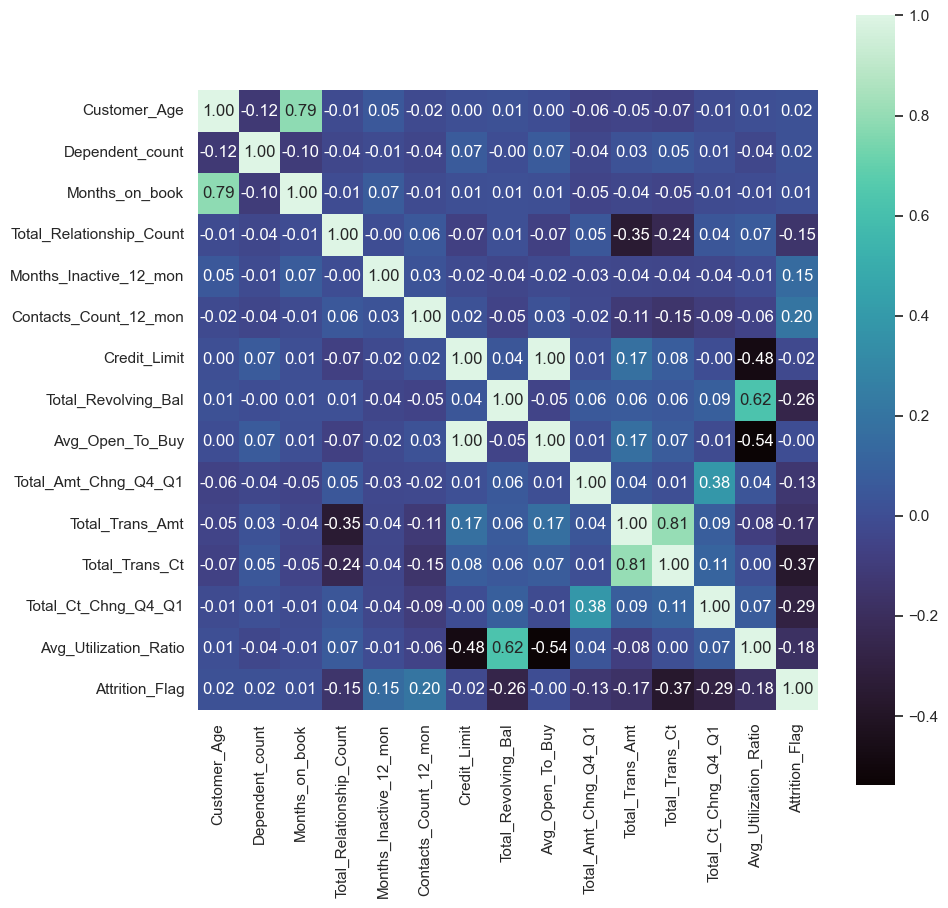

In [16]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmin=None,
    cmap="mako",
    annot=True,
    fmt='.2f',
    cbar=True,
    square=True)

for i in cat_col:
    if i != "Attrition_Flag":
        cor_cat(i)

<10% is lacking correlation

In [17]:
correlated_columns = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender', 'Education_Level', 'Marital_Status', 
                      'Income_Category', 'Card_Category', 'Attrition_Flag']

## 03. Feature Engineering

### Feature Selection

In [18]:
bank_df = bank_df[correlated_columns]

bank_df.shape

(10127, 16)

### Resampling

In [19]:
# Separate majority and minority classes
majority_class = bank_df[bank_df['Attrition_Flag'] == 'Existing Customer']
minority_class = bank_df[bank_df['Attrition_Flag'] == 'Attrited Customer']

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=5)

# Combine the upsampled data with the original majority class
bank_df = pd.concat([majority_class, upsampled_minority])

### Split Target and Features

In [20]:
X = bank_df.drop(columns="Attrition_Flag")
y = bank_df["Attrition_Flag"]

X.shape, y.shape

((17000, 15), (17000,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=5)

X_train.shape, y_train.shape

((11900, 15), (11900,))

### Pipeline

In [22]:
bank_df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [23]:
#define variable used in pipeline
outliers=['Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
onehot_col = ["Gender", "Marital_Status"]
ordinal_col = ["Education_Level", "Income_Category", "Card_Category"]

In [24]:
#define ordinal ranking
education = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post_Graduate', 'Doctorate']
income = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card = ['Blue', 'Silver', 'Gold', 'Platinum']


#### Capping Outliers - Winsorizer

In [25]:
#create the capper
winsorizer_pipeline = Pipeline(
    [
        (
            "winsorizer",
            Winsorizer(
                capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                tail='both', # cap left, right or both tails 
                fold=1.5,
                variables=outliers)
         )
        ]
    )

#### Encoding - Onehot and Ordinal

In [26]:
#ordinal encoder
ordinal_pipeline = Pipeline(
    [
        (
            "ordinal_encoder",
            OrdinalEncoder(
                categories=[education,income,card],
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
        )  # encode using ordinal encoder
    ]
)

In [27]:
#onehot encoder
onehot_pipeline = Pipeline(
    [
        (
            "onehot_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        )  # encode using onehot encoder
    ]
)

In [28]:
#label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y = label_encoder.transform(y)

y_train

array([1, 0, 0, ..., 1, 1, 1])

#### Scaling

In [29]:
#robust scaler
robust_pipeline = Pipeline(
    [
        (
            "robust_scaler",
            RobustScaler()
        )
    ]
)

#### Pipeline - Column Transformer

In [30]:
#make columntransformer
col_transformers = ColumnTransformer(
    [
        ("pipe_winsor", winsorizer_pipeline, outliers),
        ("pipe_ord", ordinal_pipeline, ordinal_col),
        ("pipe_onehot", onehot_pipeline, onehot_col),
        ("pipe_scaler", robust_pipeline, num_col),
    ]
)

## 04. Base Modeling

### Support Vector Machine Classifier

In [31]:
#define model
svc = SVC()

svc_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("svc", svc)
])

In [32]:
#train model
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital_Status']),
                                                 ('pipe_scaler',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('svc', SVC())])

In [33]:
#train evaluation
svc_train_score = cross_val_score(svc_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", svc_train_score)
print("Mean CV score:", svc_train_score.mean())

Cross-validation scores: [0.14211886 0.6824264  0.7959381  0.76388262 0.55212766]
Mean CV score: 0.5872987301156007


### Decision Tree Classifier

In [34]:
#define Model
decision_tree = DecisionTreeClassifier()

dt_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("decision_tree", decision_tree)
])

In [35]:
#train model
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                  ['Gender', 'Marital_Status']),
                                                 ('pipe_scaler',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('decision_tree', DecisionTreeClassifier())])

In [36]:
#train evaluation
dt_train_score = cross_val_score(dt_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", dt_train_score)
print("Mean CV score:", dt_train_score.mean())

Cross-validation scores: [0.99629904 0.99734748 0.99583581 0.99522673 0.98837209]
Mean CV score: 0.9946162306412182


### Random Forest Classifier

In [37]:
#define Model
rf = RandomForestClassifier()

rf_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("random_forest", rf)
])

In [38]:
#train model
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                                                  ['Gender', 'Marital_Status']),
                                                 ('pipe_scaler',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('random_forest', RandomForestClassifier())])

In [39]:
#train evaluation
rf_train_score = cross_val_score(rf_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", rf_train_score)
print("Mean CV score:", rf_train_score.mean())

Cross-validation scores: [0.99781818 1.         0.99940793 0.99882006 0.996     ]
Mean CV score: 0.9984092349007611


### XGBoost Classifier

In [40]:
#define Model
xgb = XGBClassifier()

xgb_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("xgboost", xgb)
])

In [41]:
#train model
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_C...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [42]:
#train evaluation
xgb_train_score = cross_val_score(xgb_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", xgb_train_score)
print("Mean CV score:", xgb_train_score.mean())

Cross-validation scores: [0.99863014 0.99936346 0.99881517 0.99940933 0.99589322]
Mean CV score: 0.9984222643981457


### Model Test Evaluation

In [43]:
#predict
svc_test_pred = svc_pipeline.predict(X_test)
dt_test_pred = dt_pipeline.predict(X_test)
rf_test_pred = rf_pipeline.predict(X_test)
xgb_test_pred = xgb_pipeline.predict(X_test)

In [44]:
#classification report
svc_report = classification_report(y_true=y_test, y_pred=svc_test_pred)
dt_report = classification_report(y_true=y_test, y_pred=dt_test_pred)
rf_report = classification_report(y_true=y_test, y_pred=rf_test_pred)
xgb_report = classification_report(y_true=y_test, y_pred=xgb_test_pred)

report = {'SVC': svc_report, 
          'DT' : dt_report, 
          'RF' : rf_report, 
          'XGB' : xgb_report}

In [45]:
for i in report:
    print('='*25 + ' '+ i + ' ' + '='*25)
    print(report[i])
    print("\n")

========================= SVC =========================
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2551
           1       0.76      0.68      0.72      2549

    accuracy                           0.73      5100
   macro avg       0.73      0.73      0.73      5100
weighted avg       0.73      0.73      0.73      5100



========================= DT =========================
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2551
           1       0.99      0.96      0.98      2549

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



========================= RF =========================
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2551
           1       1.00      0.97      0.98      2549

    accuracy

## 05. Model Improvement

### Hyperparameter Tuning

In [46]:
params = {
    'xgboost__max_depth': [3, 4, 5, 6],
    'xgboost__learning_rate': [0.1, 0.01, 0.001],
    'xgboost__n_estimators': [100, 500, 1000],
    'xgboost__subsample': [0.8, 0.9, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=params, cv=5, scoring='precision', verbose=1)

In [47]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('pipe_winsor',
                                                                         Pipeline(steps=[('winsorizer',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['Credit_Limit',
                                                                                                                'Total_Amt_Chng_Q4_Q1',
                                                                                                                'Total_Trans_Amt',
                                                                                                                'Total_Trans_Ct',
                                                                                                                'Total_Ct_Chng_Q4_Q1']))]),
                                                                         ['Credit_Limit',
                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                          'Tot...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__learning_rate': [0.1, 0.01, 0.001],
                         'xgboost__max_depth': [3, 4, 5, 6],
                         'xgboost__n_estimators': [100, 500, 1000],
                         'xgboost__subsample': [0.8, 0.9, 1.0]},
             scoring='precision', verbose=1)

In [48]:
print(grid_search.best_params_)

{'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 1000, 'xgboost__subsample': 1.0}


### Model Evaluation

In [49]:
xgb_improved_pred = grid_search.predict(X_test)

In [50]:
xgb_improved_report = classification_report(y_true=y_test, y_pred=xgb_improved_pred)

print(xgb_improved_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2551
           1       1.00      0.98      0.99      2549

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100



<Axes: >

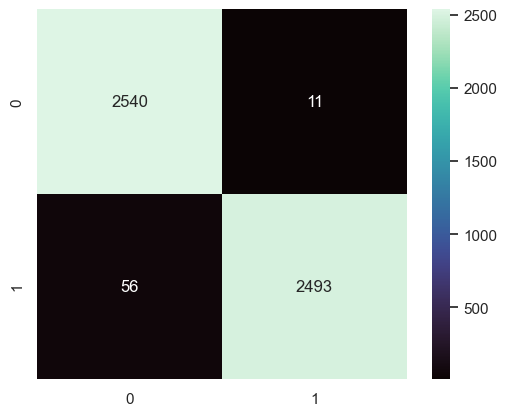

In [51]:
cm_df = confusion_matrix(y_true=y_test, y_pred=xgb_improved_pred)
sns.heatmap(cm_df, vmin=None,
    cmap="mako",
    annot=True,
    fmt='.0f',
    cbar=True,
    square=True)

In [52]:
#save file
with open('./deployment/model/xgb_tuned.pkl', 'wb') as file:
  pickle.dump(grid_search, file)

## 06. Churn Clustering

In [53]:
bank_df_churned = bank_df[bank_df['Attrition_Flag']=='Attrited Customer']
bank_df_churned.drop(columns=['Attrition_Flag'], inplace=True)

### PCA

In [54]:
# define pca
pca_model = Pipeline(
    [
        ("column_transformer", col_transformers),
        ("PCA", PCA(n_components=2))
    ]
)


In [55]:
bank_df_pca = pca_model.fit_transform(bank_df_churned)

bank_df_pca.shape

(8500, 2)

In [56]:
bank_df_2 = col_transformers.transform(bank_df_churned)

### Elbow Point and Sillhouete Score

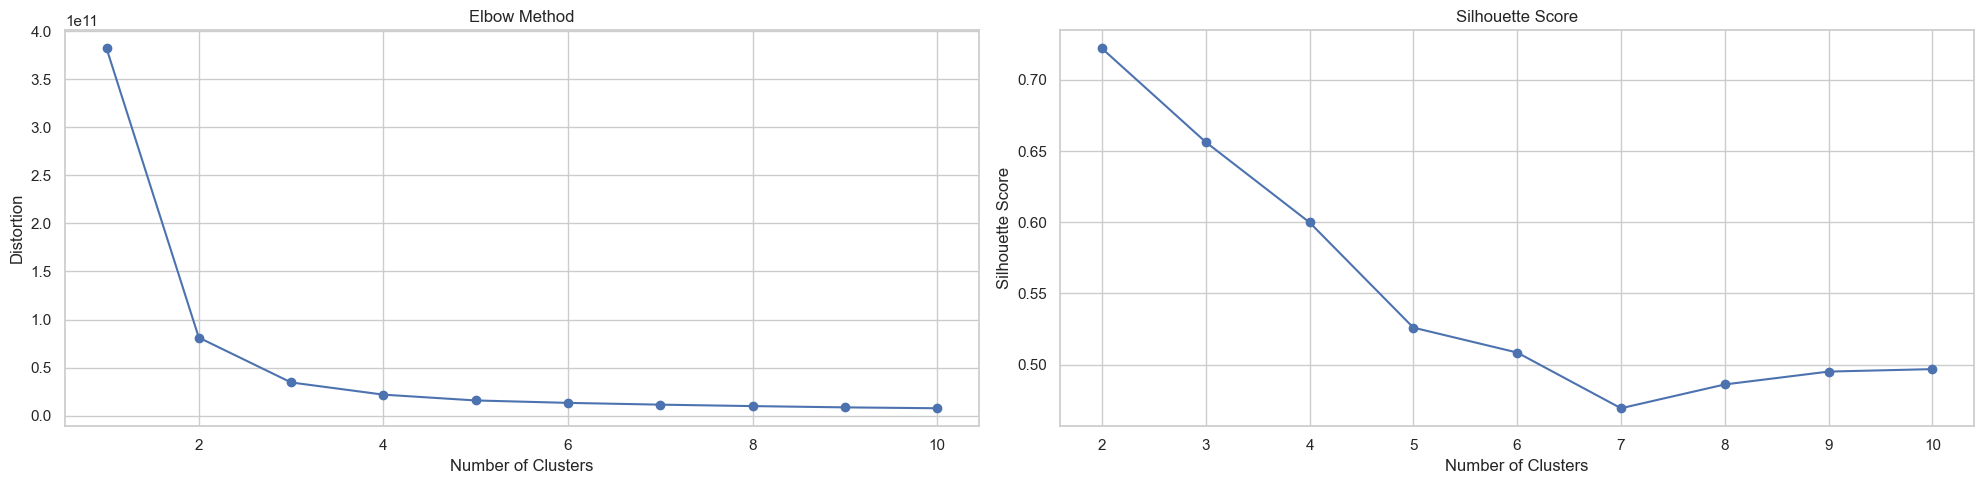

In [57]:
# Calculate distortions (inertia) for different numbers of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(bank_df_2)
    distortions.append(kmeans.inertia_)

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(bank_df_2)
    labels = kmeans.labels_
    score = silhouette_score(bank_df_2, labels)
    silhouette_scores.append(score)

# Plot elbow point (distortions)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### Define Kmeans Final Model

In [90]:
#define kmeans model
kmeans_model = Pipeline(
    [
        (
            "Kmeans",
            KMeans(n_clusters=2, n_init='auto', random_state=5)
        )
    ]
)

#define pipeline
kmeans_pipeline = Pipeline([
    ("pca", pca_model),
    ("kmeans", kmeans_model)
])

In [91]:
kmeans_pipeline.fit(bank_df_churned)

Pipeline(steps=[('pca',
                 Pipeline(steps=[('column_transformer',
                                  ColumnTransformer(transformers=[('pipe_winsor',
                                                                   Pipeline(steps=[('winsorizer',
                                                                                    Winsorizer(capping_method='iqr',
                                                                                               fold=1.5,
                                                                                               tail='both',
                                                                                               variables=['Credit_Limit',
                                                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                                                          'Total_Trans_Amt',
                                                                                                          'Total_Trans_Ct',
                                                                                                          'Total_Ct_Chng_Q4_Q1']))]),
                                                                   ['Credit_Limit',
                                                                    'Total_Amt_Chng_Q4_Q1',
                                                                    'Total_Tr...
                                                                                    RobustScaler())]),
                                                                   ['Total_Relationship_Count',
                                                                    'Months_Inactive_12_mon',
                                                                    'Contacts_Count_12_mon',
                                                                    'Credit_Limit',
                                                                    'Total_Revolving_Bal',
                                                                    'Total_Amt_Chng_Q4_Q1',
                                                                    'Total_Trans_Amt',
                                                                    'Total_Trans_Ct',
                                                                    'Total_Ct_Chng_Q4_Q1',
                                                                    'Avg_Utilization_Ratio'])])),
                                 ('PCA', PCA(n_components=2))])),
                ('kmeans',
                 Pipeline(steps=[('Kmeans',
                                  KMeans(n_clusters=2, n_init='auto',
                                         random_state=5))]))])

### Cluster Result Analysis

In [92]:
label = kmeans_pipeline.named_steps['kmeans'].named_steps['Kmeans'].labels_

clusters= pd.DataFrame(bank_df_churned)
clusters["cluster"] = label
clusters.head()

Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6397                         6                       3                      2   
2619                         3                       5                      5   
7028                         2                       3                      3   
7761                         2                       4                      1   
9327                         6                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
6397        3468.0                 2517                 0.746   
2619        1438.3                    0                 0.647   
7028       23542.0                 1307                 0.462   
7761        1760.0                    0                 0.046   
9327        4109.0                    0                 0.949   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
6397             2494              39                0.345   
2619             1603              39                0.444   
7028             2152              46                0.438   
7761             1554              35                0.029   
9327             8642              77                0.481   

      Avg_Utilization_Ratio Gender Education_Level Marital_Status  \
6397                  0.726      F      Uneducated        Unknown   
2619                  0.000      F        Graduate         Single   
7028                  0.056      M        Graduate        Married   
7761                  0.000      F   Post-Graduate        Married   
9327                  0.000      M         College         Single   

     Income_Category Card_Category  cluster  
6397  Less than $40K          Blue        1  
2619  Less than $40K          Blue        1  
7028    $80K - $120K          Blue        0  
7761  Less than $40K          Blue        1  
9327     $60K - $80K          Blue        1

In [93]:
clusters["cluster"].value_counts()

cluster
1    6548
0    1952
Name: count, dtype: int64

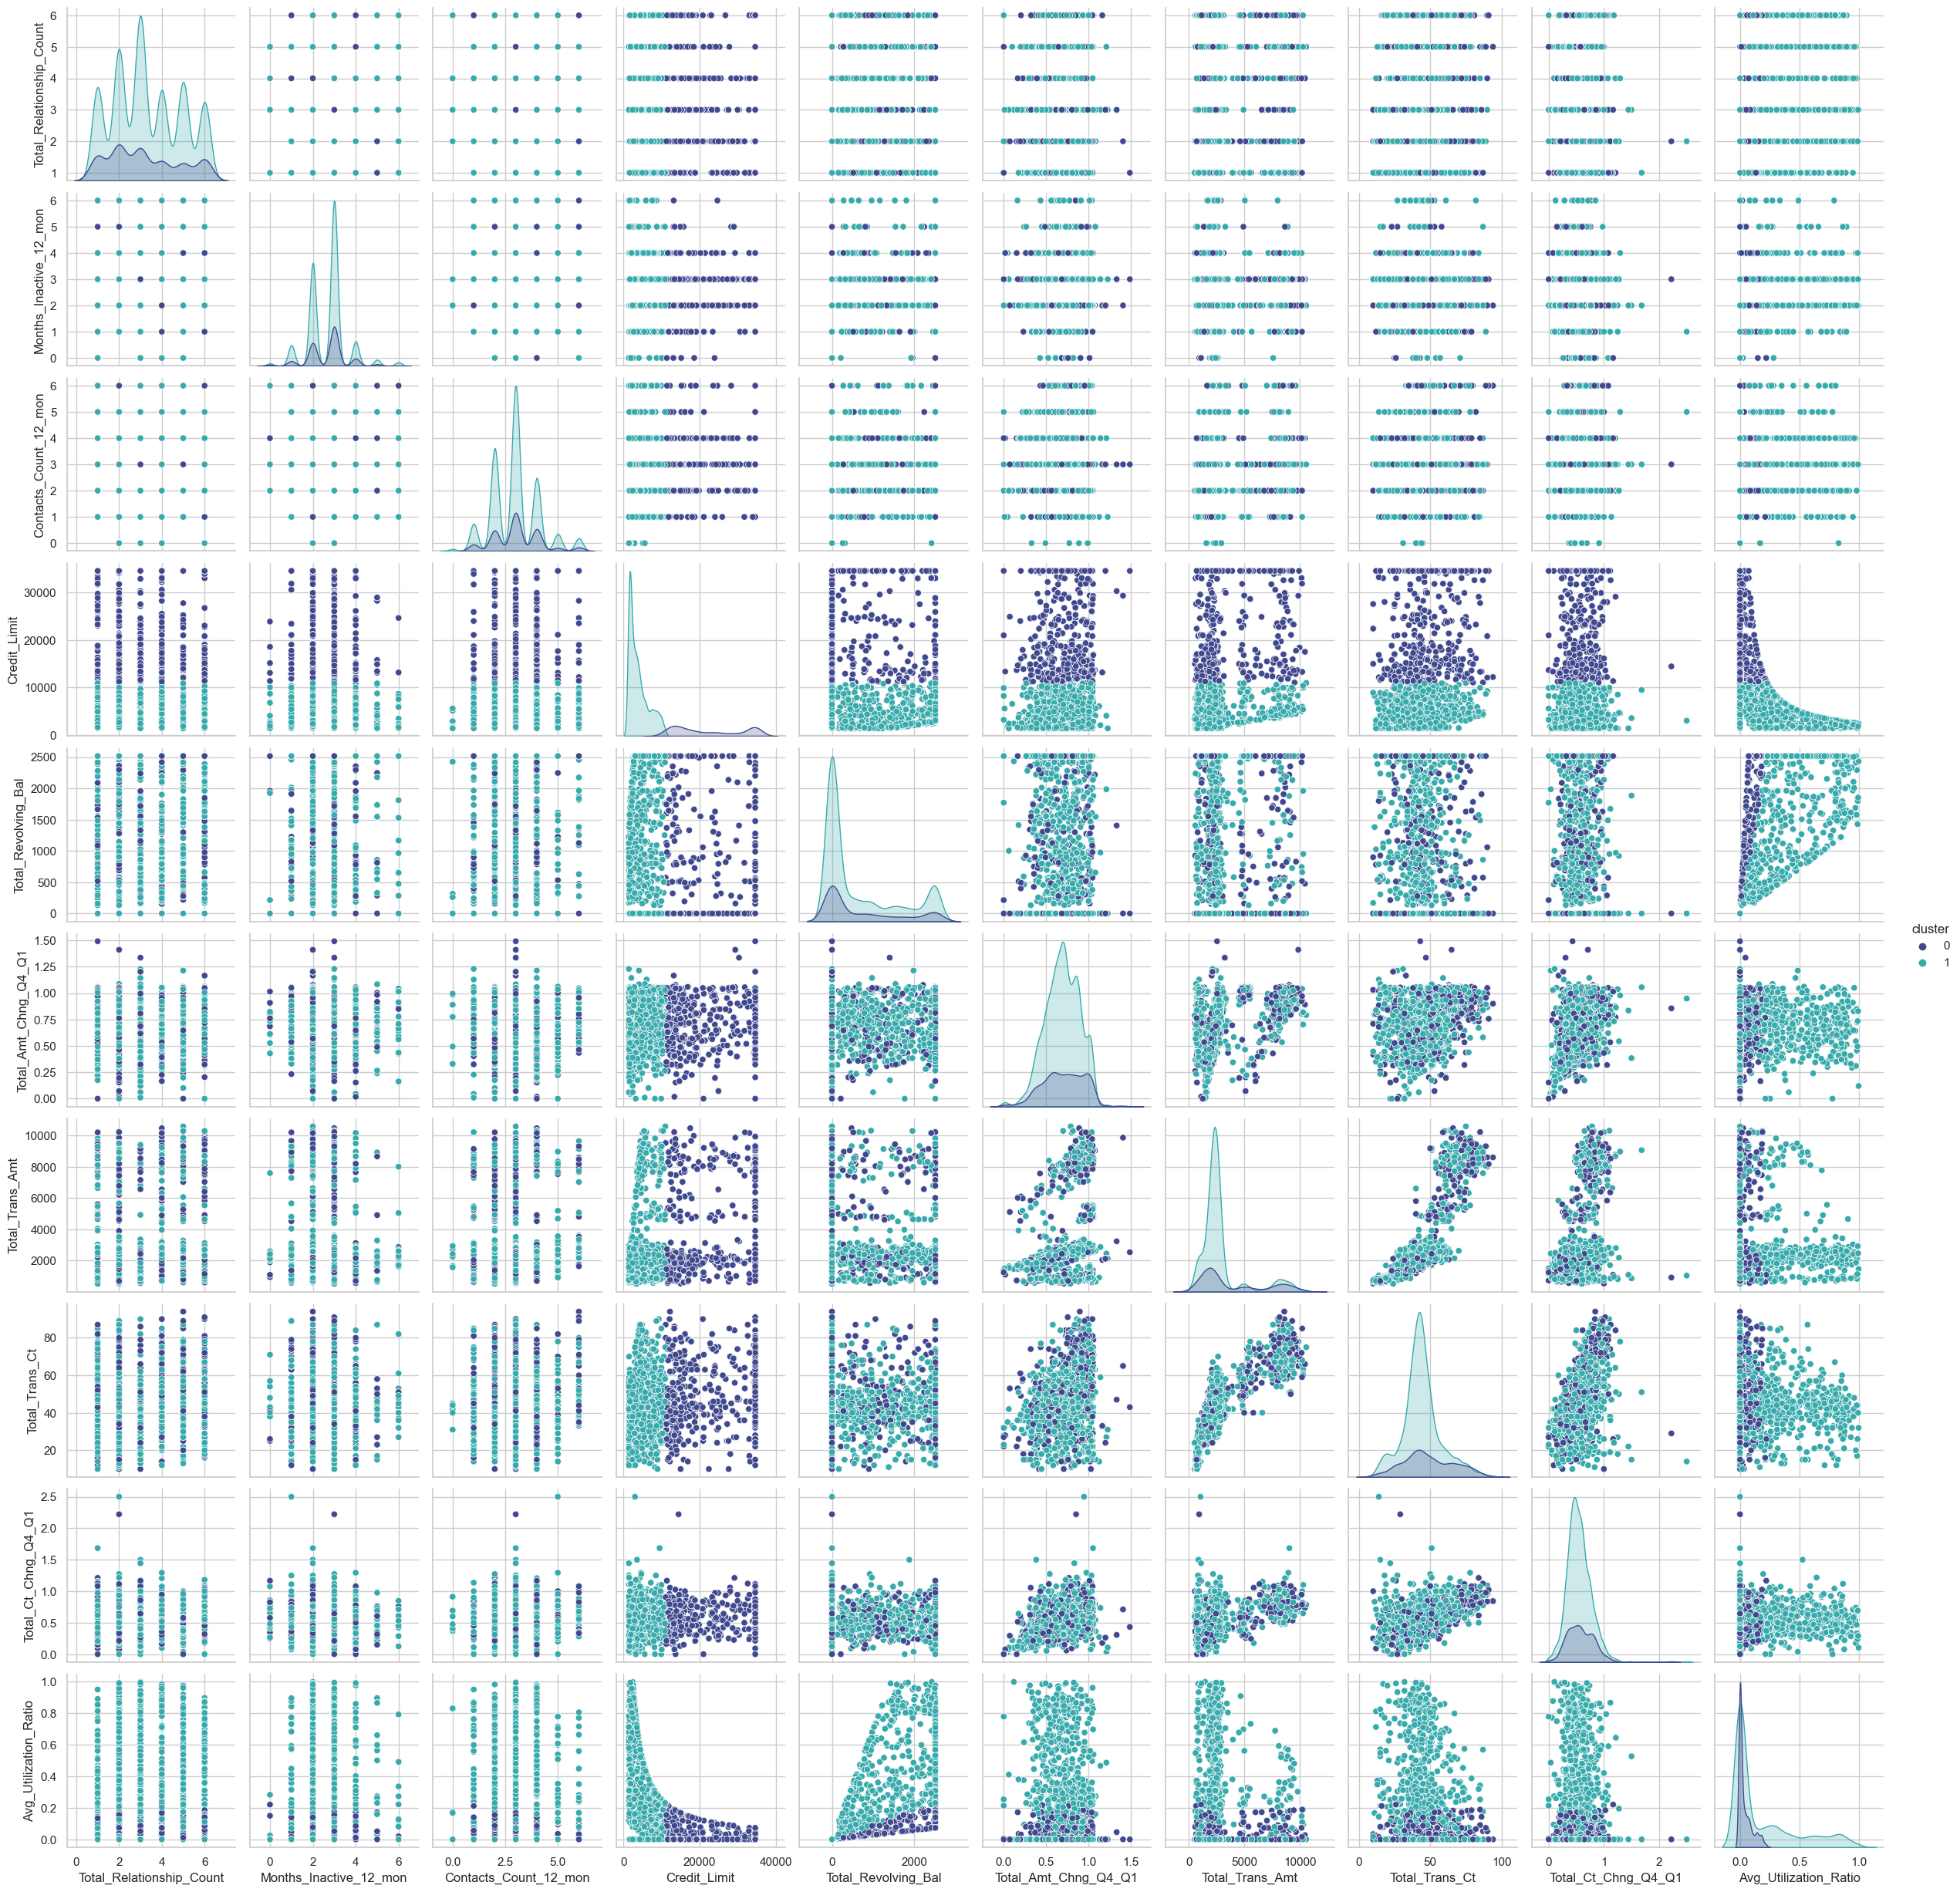

In [94]:
sns.pairplot(clusters, hue="cluster", palette="mako")

In [122]:
clusters.select_dtypes(include=object).columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

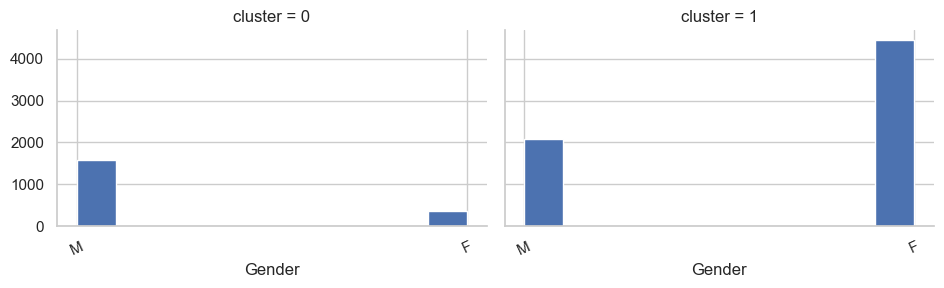

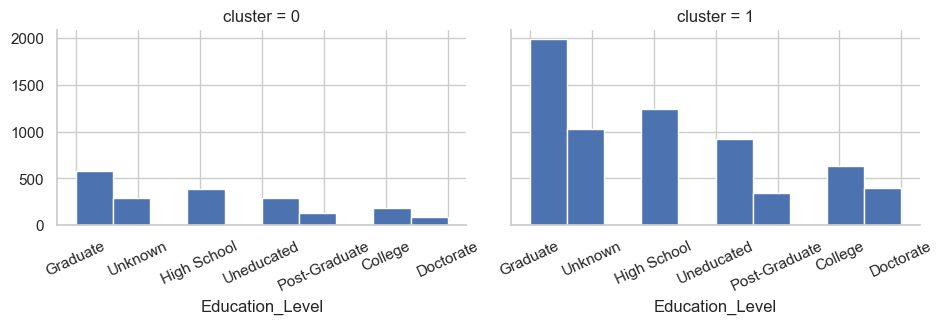

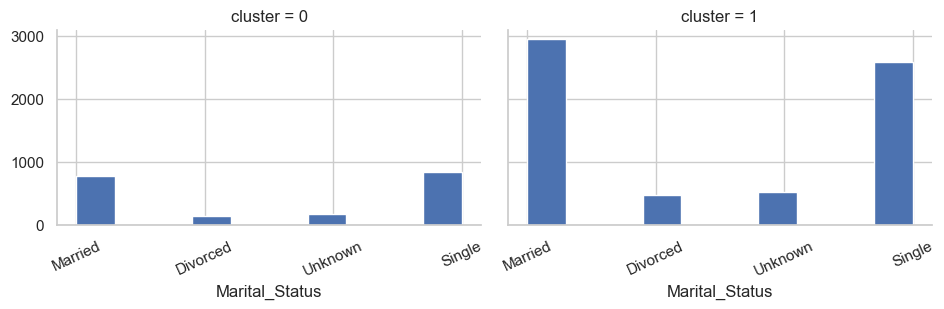

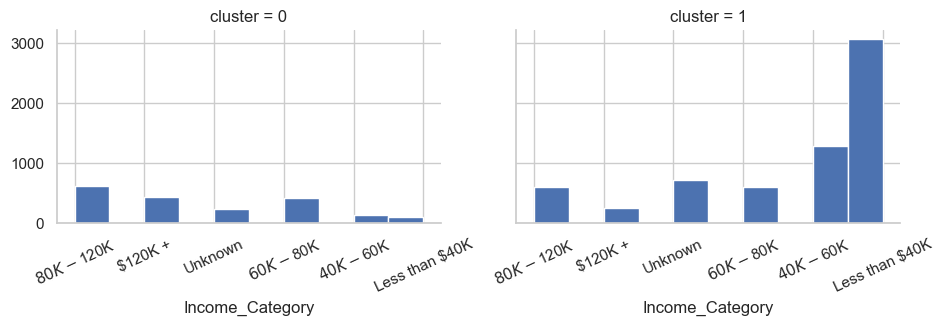

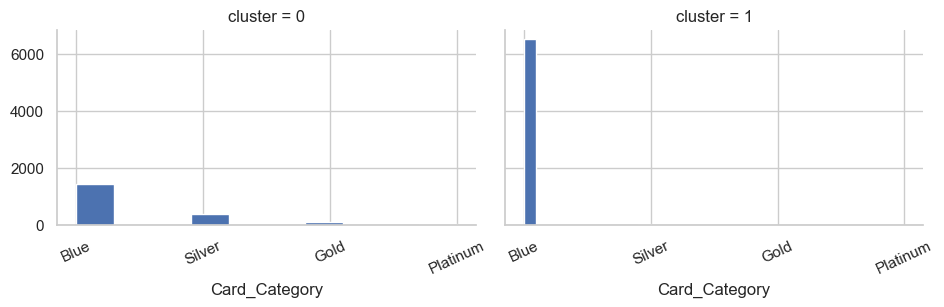

In [142]:
for c in clusters [['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']]:
    grid= sns.FacetGrid(clusters, col='cluster', aspect=1.6, palette="mako")
    grid.map(plt.hist, c)
    grid.set_xticklabels(rotation=25)

Text(0.5, 1.0, 'Income Category Distribution')

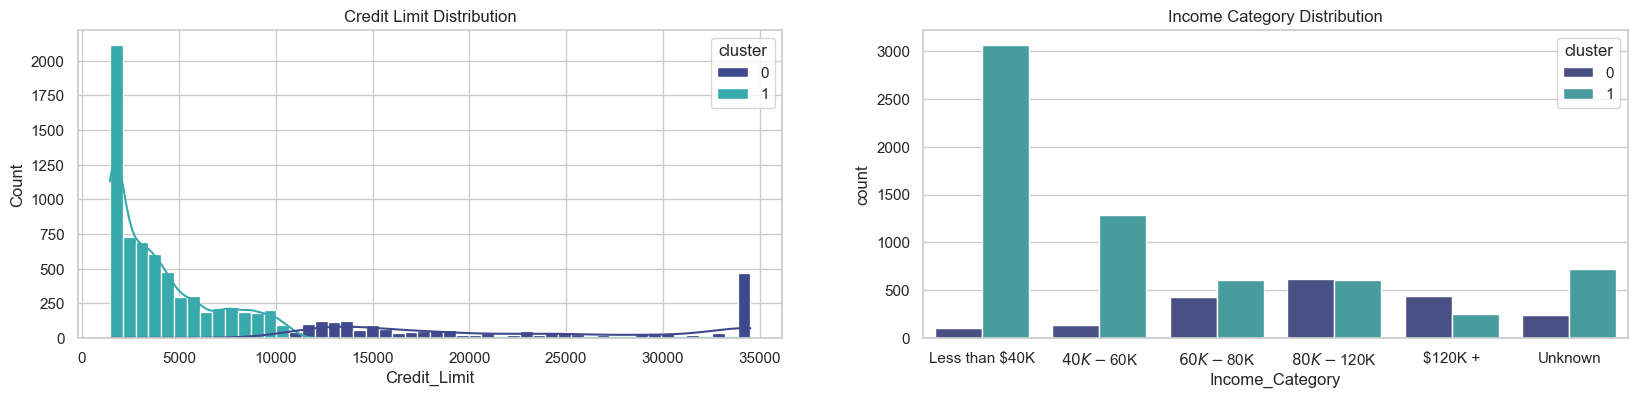

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

#plot for Credit_Limit
sns.histplot(data=clusters, x="Credit_Limit", hue="cluster", kde=True, bins=50, palette="mako", alpha=1, ax=axes[0])
axes[0].set_title("Credit Limit Distribution")

#plot for Income_Category
custom_order = [
    'Less than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +', 'Unknown'
]

sns.countplot(data=clusters, x="Income_Category", hue="cluster", palette="mako", alpha=1, ax=axes[1], order=custom_order)
axes[1].set_title("Income Category Distribution")

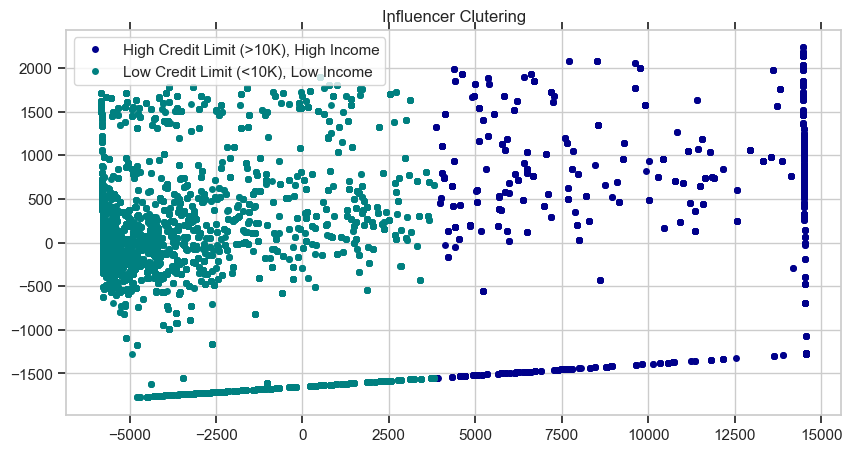

In [159]:
#visualize into 2d plot
#visualize

x, y = bank_df_pca[:, 0], bank_df_pca[:, 1]

colors = {0: 'darkblue',
          1: 'teal',}

names = {0: 'High Credit Limit (>10K), High Income', 
         1: 'Low Credit Limit (<10K), Low Income'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':label}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Influencer Clutering")
plt.show()

In [121]:
with open('./deployment/model_kmeans.pkl', 'wb') as file_4:
  pickle.dump(kmeans_pipeline, file_4)